# Data description :

# 1 - Introduction:

The primary cause of death in the world is heart failure disease¹.In 2019, 32 percent of all deaths worldwide were attributed to CVDs, killing an estimated 17.9 million people. Heart attacks and strokes were to blame for 85% of these deaths[2].
our data set is generated to model a Heart Failure Prediction result. we aim to study data that will then help us solving a problem that early diagnosis of coronary heart disease that is important to enable counseling and medication management.This is by having factors that increase the risk of heart disease.


¹Heart failure is a lifelong condition in which the heart muscle can't pump enough blood to meet the body's needs for blood and oxygen..

# 2- Machine learning tasks:
Our problem will be classification, Classification is a supervised machine learning method where the model tries to predict the correct label of a given input data so in our case,  HeartDisease as {0,1}, indicating weather a patient had a Heart Disease or not. 
As a result, the data will be divided into two groups: [1: Having heart disease, 0: Normal].


# 3- Data: 
The dataset is called "Heart Failure Prediction Dataset" which we got from Koggle.com. it is data for classifing patients based on weather a patient had a Heart Disease or not,our dataset is the largest heart disease dataset currently available for research purposes, this dataset combines 5 heart datasets using 11 features in common.

URL : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

The data set contains 918 observations with 12 attributes.
# Attribute Information
| Variable | Type | Definition | Guide |
| --- | --- | --- | --- |
| Age | Integer | age of the patient | years |
| Sex | String | sex of the patient | M: Male, F: Female |
| ChestPainType |String | chest pain type | <br>TA: Typical Angina<br><br>ATA: Atypical Angina<br><br>NAP: Non-Anginal Pain<br><br>ASY: Asymptomatic<br> |
| RestingBP | Integer |resting blood pressure | mm Hg |
| Cholesterol | Integer | serum cholesterol | mm/dl |
| FastingBS | Integer | fasting blood sugar | 1: if FastingBS > 120 mg/dl<br><br>0: otherwise |
| RestingECG |String | resting electrocardiogram results | Normal: Normal<br><br>ST: having ST-T wave abnormality<br><br>LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria |
| MaxHR |Float | maximum heart rate achieved | Numeric value between 60 and 202 |
| ExerciseAngina |String | exercise-induced angina | Y: Yes, N: No |
| Oldpeak | Float |oldpeak = ST | Numeric value measured in depression |
| ST_Slope |String | the slope of the peak exercise ST segment | Up: upsloping, Flat: flat, Down: downsloping |
| HeartDisease |  Integer |output class | 1: heart disease, 0: Normal |

# Importing libraries :

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
#df=pd.read_csv("../input/heart-failure-prediction/heart.csv")
df=pd.read_csv("heart.csv")

  Sample of 5 observations from the dataset 'Heart Failure Prediction' with all attributes using head() method that shows the first 5 rows in the dataset


In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Our dataset shape indicating (number of observations , number of variables) as the result there are 918 observations and 12 variables

In [8]:
df.shape

(918, 12)

Use the info() function to summarize the data we have, the attributes and their type, and if there is any null value in any row, memory usage. Our dataset does not contain any null value, therefore no missing data.

In [9]:
df.info()
#we have three types in this data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Use .describe() and .var() function for statistical summaries to show the count ,mean ,max and variance for each numerical attributes

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
df.var()

/var/folders/yr/m675zjjn5z77t770jdbzdxd00000gn/T/ipykernel_3268/1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR             648.228614
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64

Understanding the data,  Figure 1 shows indicates that patients who have heart disease (yes = 502) and patients who did not have heart disease (no = 405), which means most patients are likely to have heart disease, especially with males Figure 2 .

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

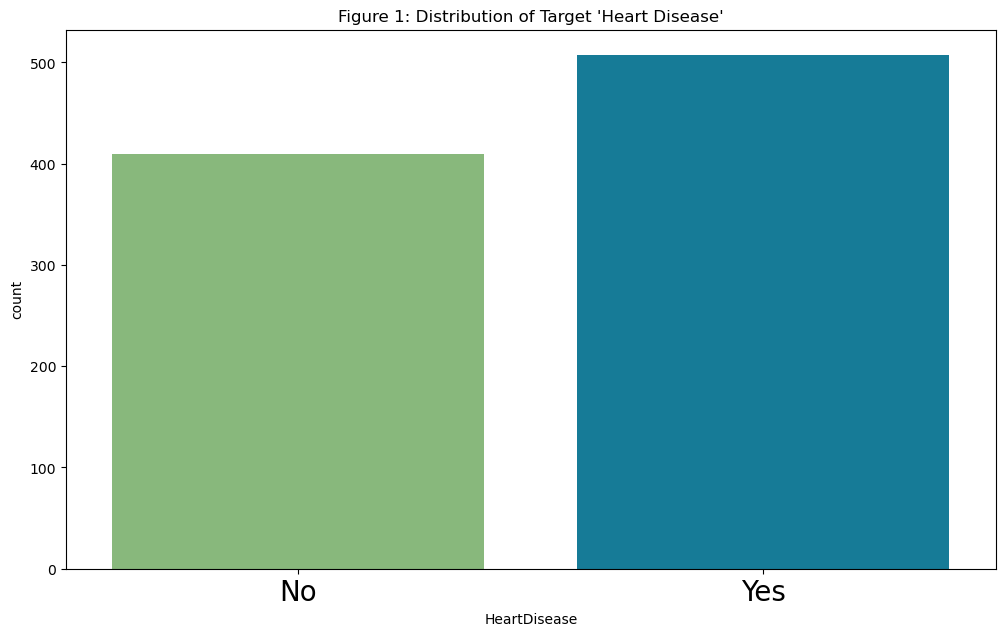

In [61]:
plt.figure(figsize=(12, 7))
heartDisease_countplot = sns.countplot(x=df.HeartDisease,palette=["#82C272", "#0087AC"])
heartDisease_countplot.set_title("Figure 1: Distribution of Target 'Heart Disease'")
heartDisease_countplot.set_xticklabels(['No', 'Yes'], fontsize=20)
#OUR TARGET IS Heart Disease :

<Figure size 1200x700 with 0 Axes>

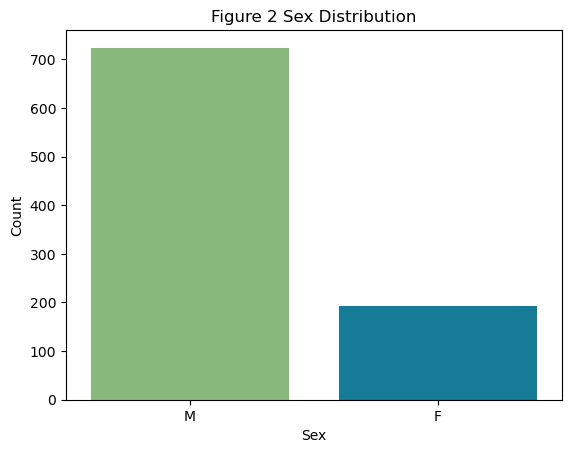

<Figure size 1200x700 with 0 Axes>

In [62]:
sns.countplot(data=df,x='Sex' , palette=["#82C272", "#0087AC"]);
plt.title('Figure 2: Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.figure(figsize=(12, 7))

in Figure 2,  we notice the who have more heart disease is the males 

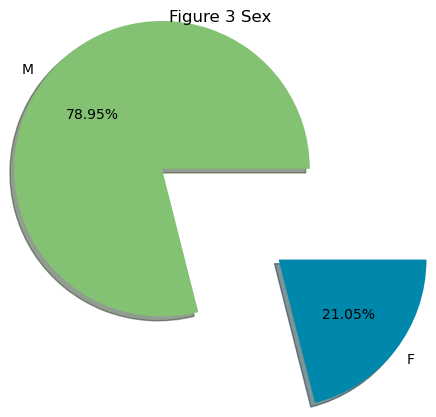

In [63]:
plt.rcParams.update({'font.size': 10})
ax=df['Sex'].value_counts().plot.pie(explode=[0.5,0.5],autopct='%1.2f%%',shadow=True , colors=["#82C272", "#0087AC"]);
ax.set_title(label = "Figure 3: Sex");
plt.axis('off');


in Figure 3,  we find 78.98% of makes have heart disease and 21.02% of females have heart disease and 
males are approximately 3 times more likely to have heart disease than females.

In [8]:
df.ChestPainType.unique() 

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

Here we check the types of chestpain :we have four types of chest pain 
    ATA,NAP,ASY,TA
   

In [65]:
ChestPainType_label = ['ATA', 'NAP', 'ASY', 'TA']
ChestPainType_size = [173, 203, 496, 46]
ChestPainType_explode = (0, 0, 0, 0)

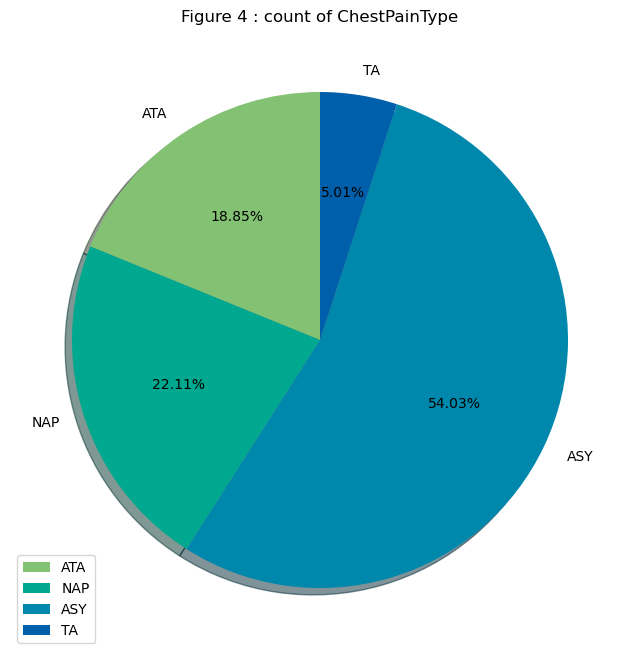

In [64]:
plt.figure(figsize=(8,9))
plt.pie( ChestPainType_size , explode=ChestPainType_explode , labels=ChestPainType_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors= ["#82C272", "#00A88F", "#0087AC", "#005FAA", "#323B81"])
plt.title("Figure 4 : count of ChestPainType")
plt.legend()

Figure 4 shows that Asymptomatic(ASY) is the type who has the highest pre for the pain chest .

Here first we have to know that  RestingECG is :a non-invasive test that can detect abnormalities including arrhythmias,evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks. 

In [22]:
RestingECG_label = ['Normal', 'ST', 'LVH']
RestingECG_size = [552, 178, 188]
RestingECG_explode = (0, 0, 0)

Figure 5 shows three levels of restingEGG':'Normal', 'ST', 'LVH'

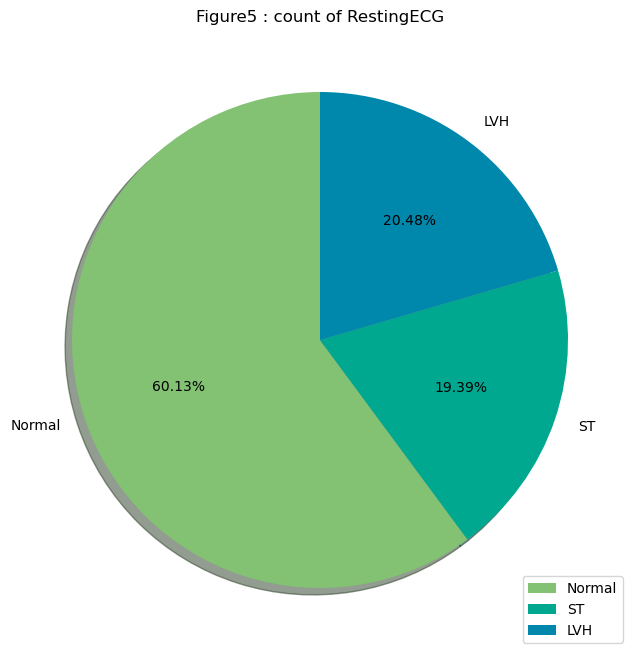

In [66]:
plt.figure(figsize=(8,9))
plt.pie( RestingECG_size , explode=RestingECG_explode , labels=RestingECG_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=["#82C272", "#00A88F", "#0087AC", "#005FAA", "#323B81"])
plt.title("Figure5 : count of RestingECG")
plt.legend()

in Figure 5 , we find that the normal have the highest percentage. 

In [67]:
ExerciseAngina_label = ['yes', 'no']
ExerciseAngina_size = [552, 178]
ExerciseAngina_explode = (0, 0)

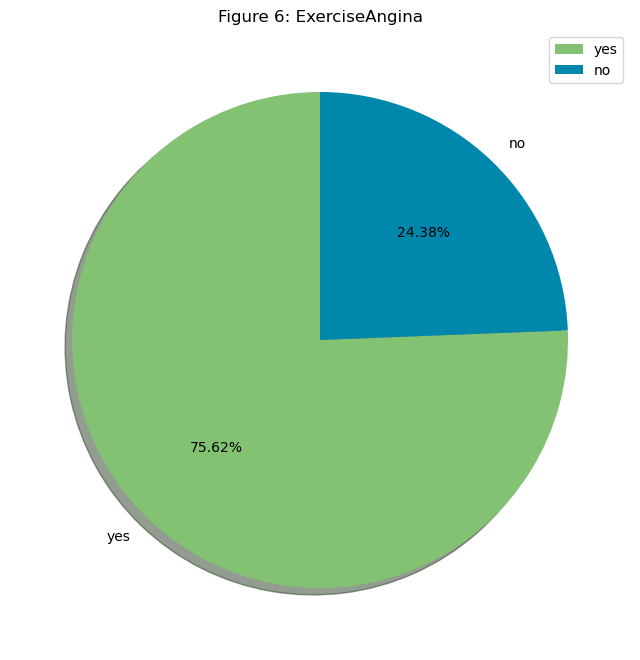

In [68]:
plt.figure(figsize=(8,9))
plt.pie( ExerciseAngina_size , explode=ExerciseAngina_explode , labels=ExerciseAngina_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=["#82C272", "#0087AC"])
plt.title("Figure 6: ExerciseAngina")
plt.legend()

in figure 6, shows who had ExerciseAngina(Yes) is more than who did not(No) and by persentage is 75.62%

In [69]:
ST_Slope_label = ['Flat','Up','Down']
ST_Slope_size = [552, 178, 188]
ST_Slope_explode = (0, 0, 0)

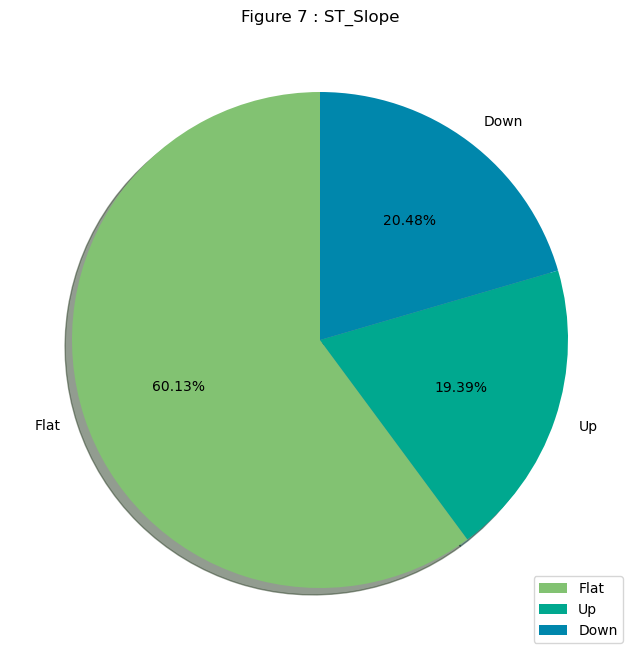

In [70]:
plt.figure(figsize=(8,9))
plt.pie( ST_Slope_size , explode=ST_Slope_explode , labels=ST_Slope_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=["#82C272", "#00A88F", "#0087AC", "#005FAA", "#323B81"])
plt.title("Figure 7 : ST_Slope")
plt.legend()

Figure 7 shows ST_Slope, which is the peak exercise ST segment, and the graph shows that the majority was flat.

In [74]:
Categorical = df.select_dtypes(include=['object'])
Numerical = df.select_dtypes(include=['int64', 'float64'])


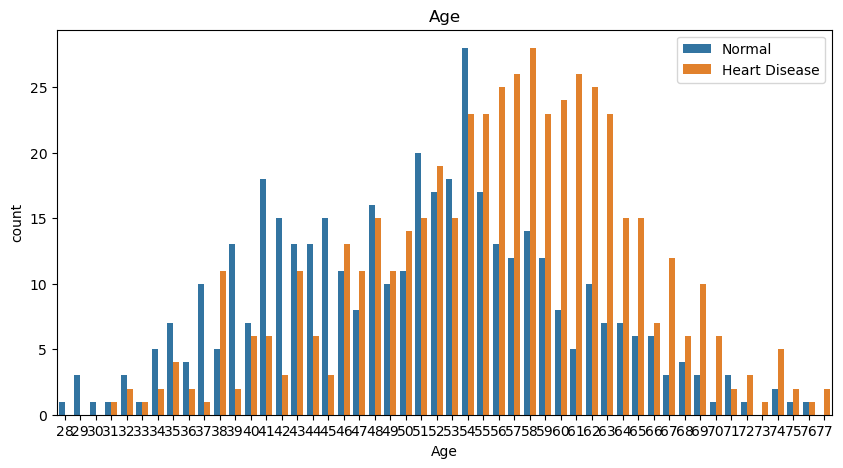

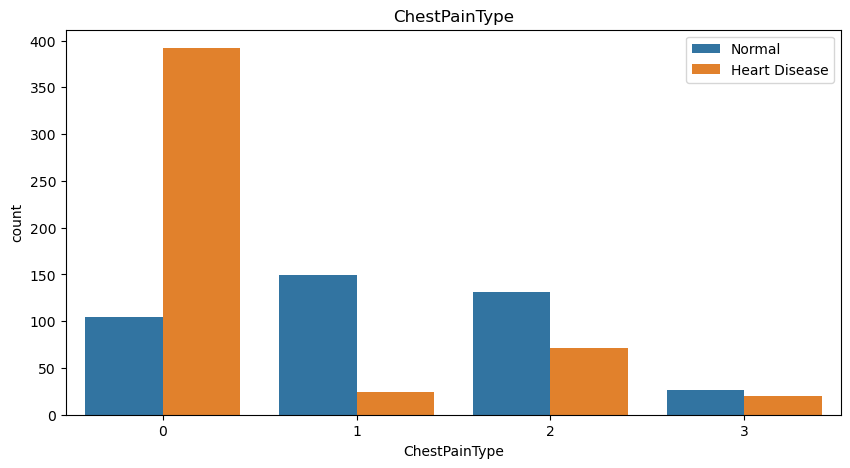

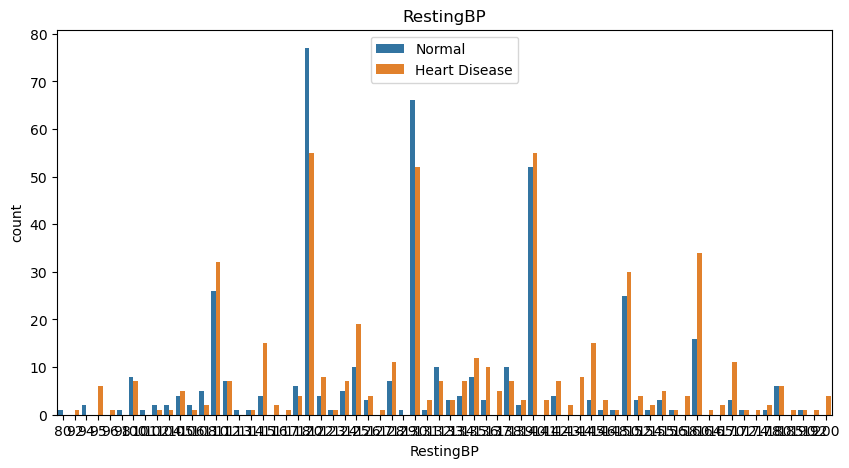

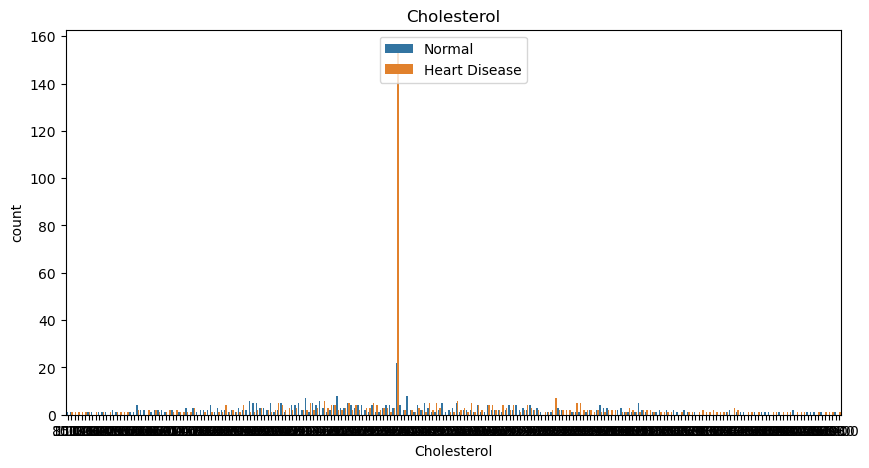

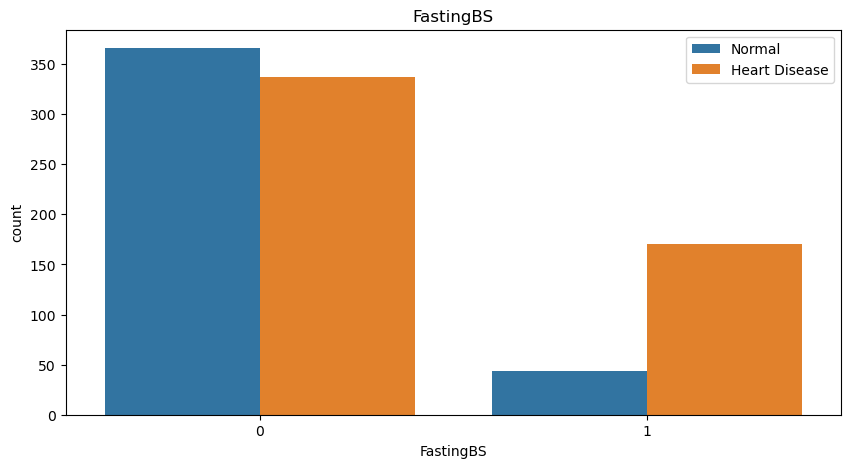

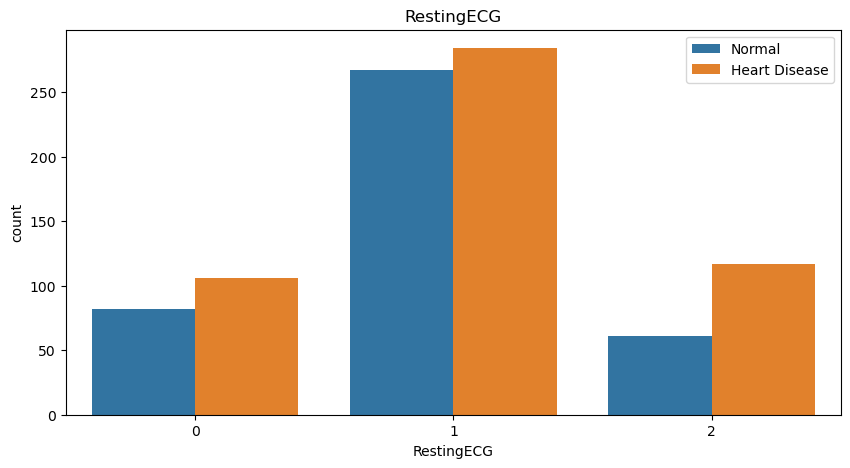

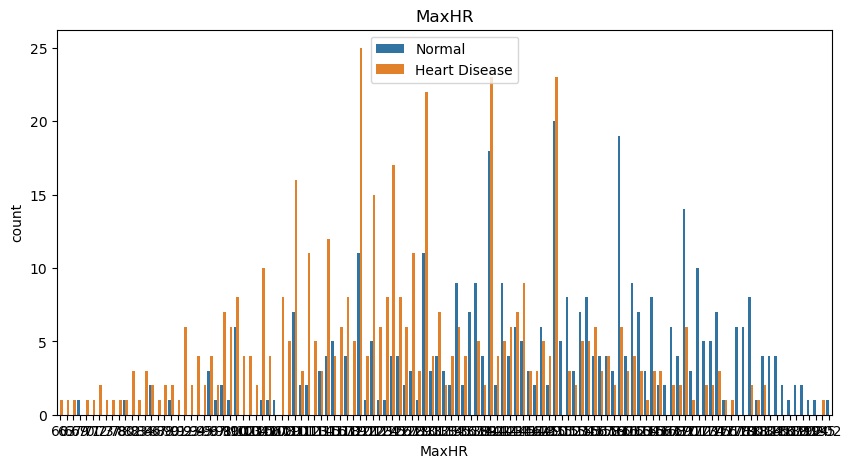

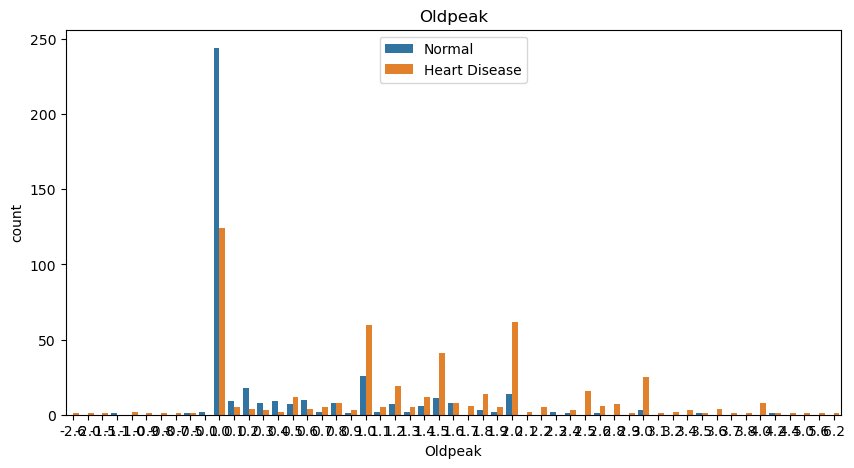

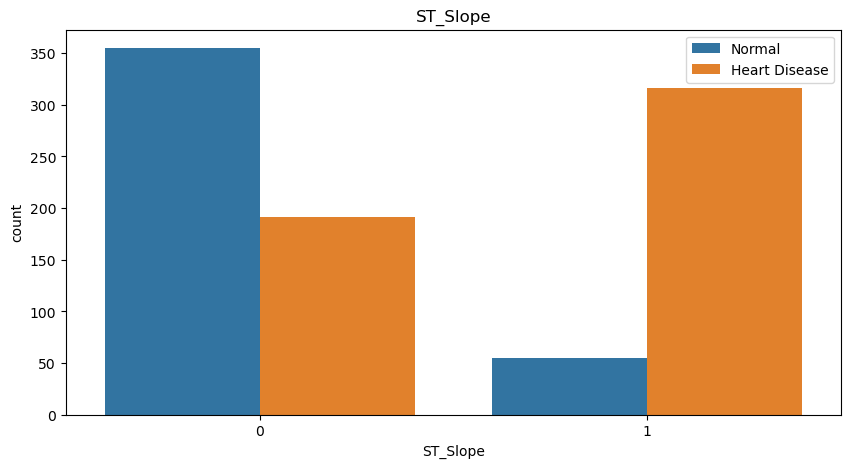

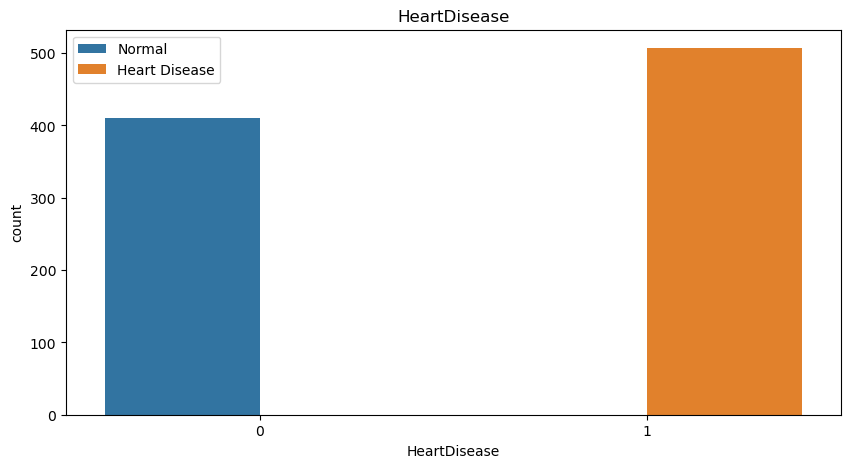

In [77]:
# ploting numerical features with target
#here we compare betwwen our target and our numerical features 
for i in Numerical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=df, hue='HeartDisease')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

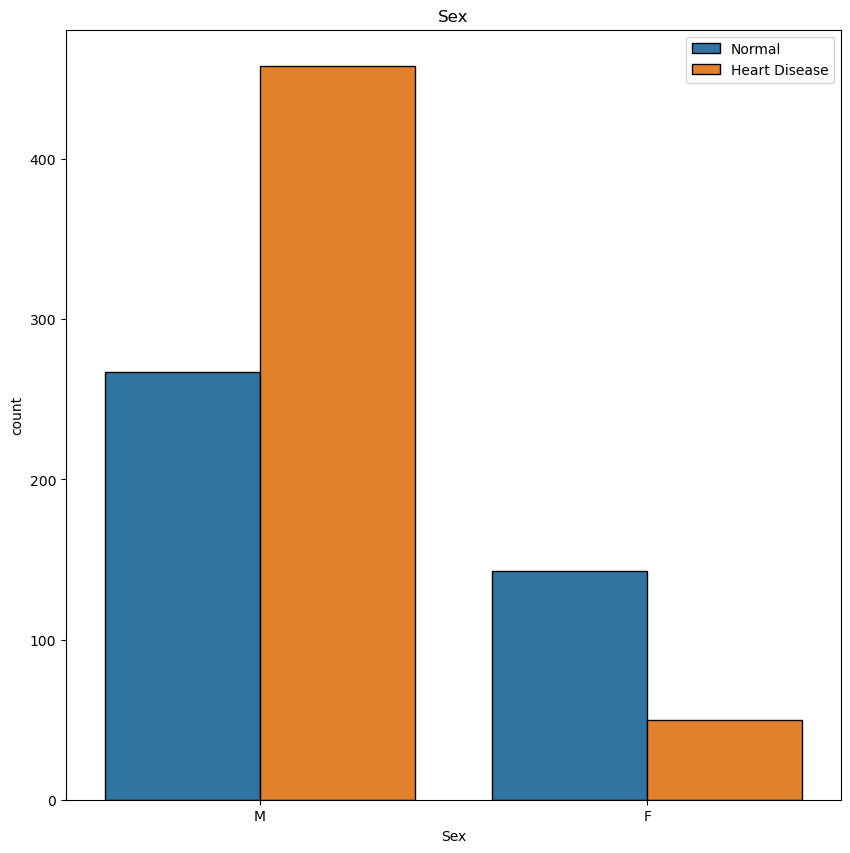

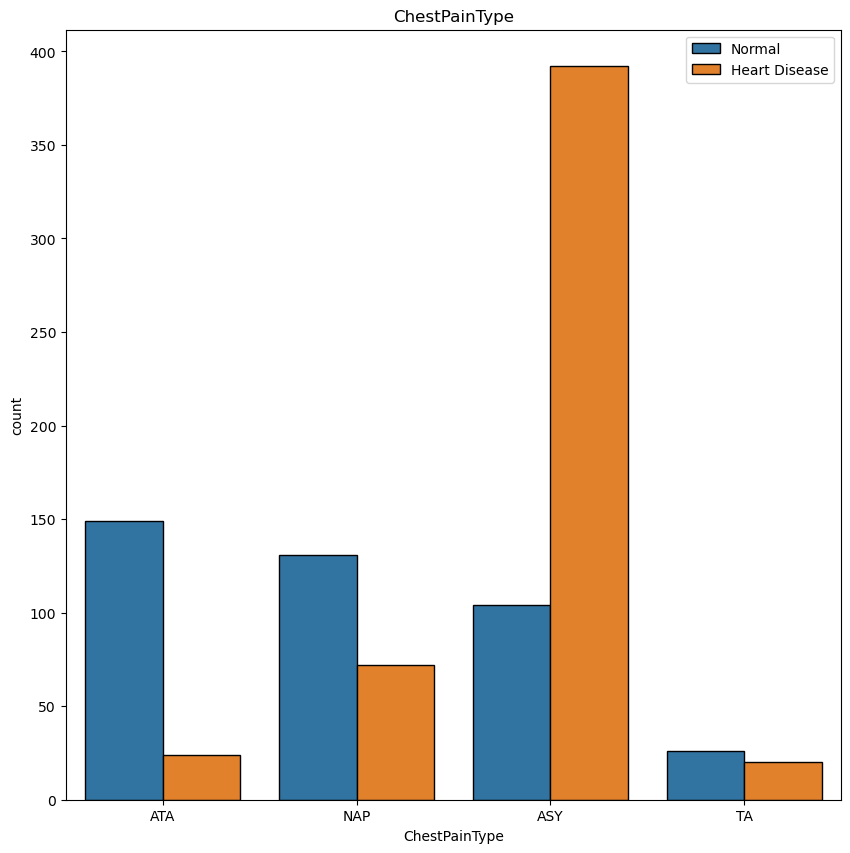

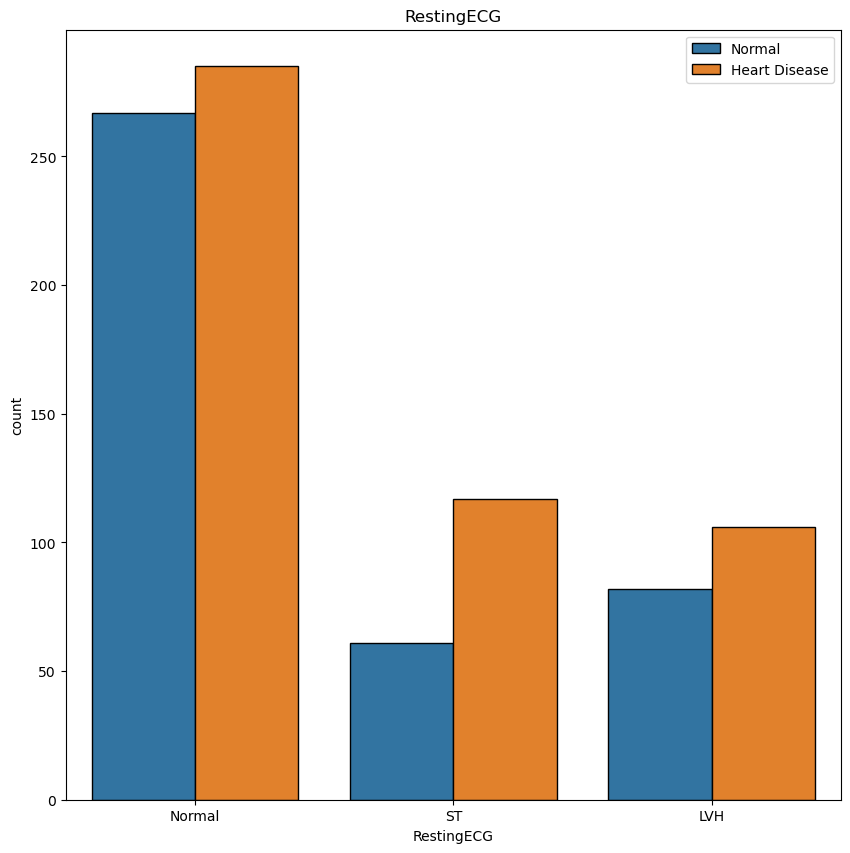

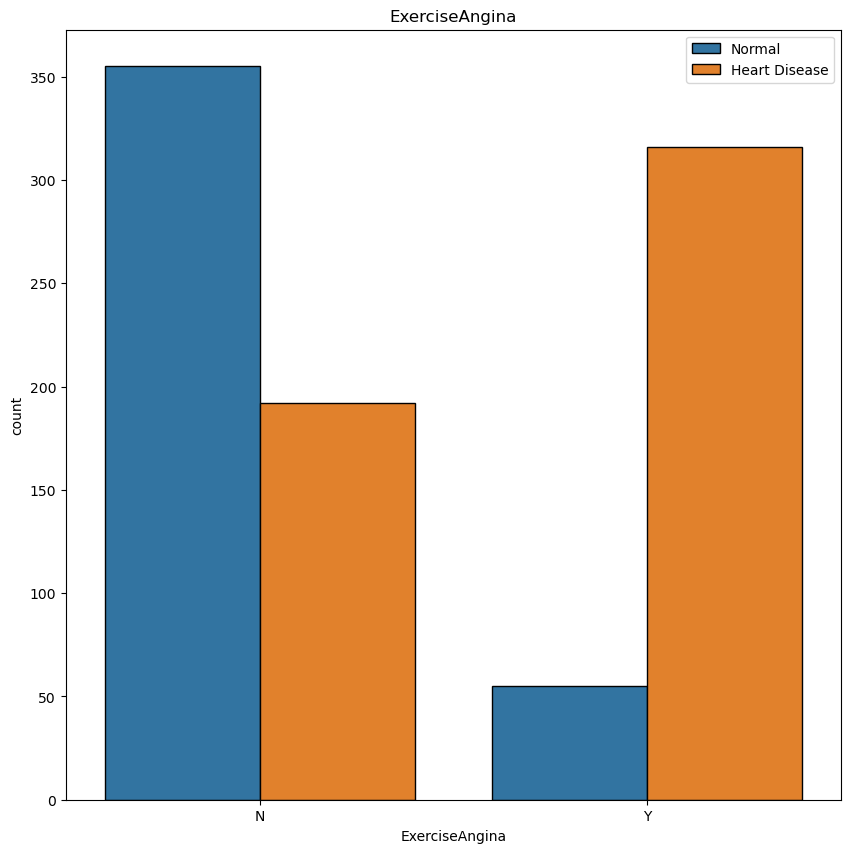

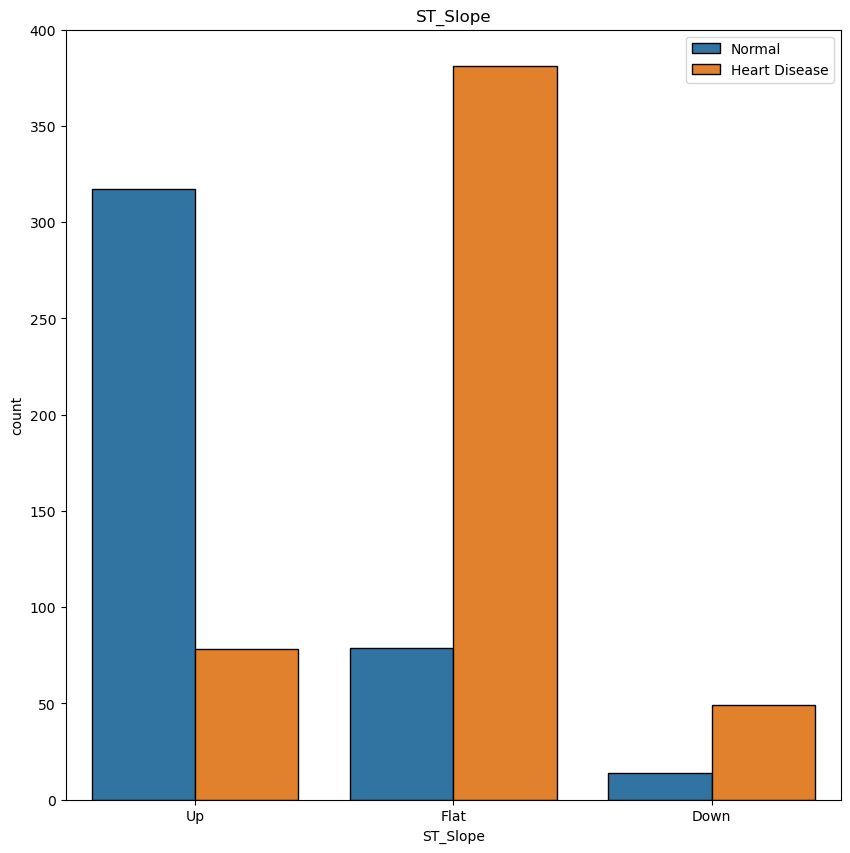

In [38]:
#here we compare betwwen our target and our Categorical features 
for i in Categorical:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i, data=df, hue='HeartDisease', edgecolor='black')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

##### observations after EDA:
1-Males are consistently more likely to have heart disease.

2-Inidividuals with ASY chest pain are consistently more likely to have heart disease.ATA and NAP are consistently less liekly to have heart disease.
The trend is inconsistent for individuals with TA.

3-Flat and down ST_Slope have higher HeartDisease rate while Up ST_Slope has lower HeartDisease rate.

4-People with higher oldpeak tend to have exercise engima. There is no obvious trend with other categorical variables

5-Cholesterol seem to be higher in females and people with low fasting blood sugar, though the difference looks small.

6-Most of heart disease Patients have age between 55 and 65

7- Most patients with 0 oldpeak, don't have Heart disease

8- Most tested Patients have RestingBP between 120 and 150


# 4-Data Preprocessing

Filling in missing values, removing noise in the data, resolving discrepancies, and removing outliers are all parts of data cleaning during data preprocessing.

### 1- Missing values:

We checked for missing data after importing the libraries and reading the dataset's csv file and discovered that there are none.

In [12]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

no missing data

### 2- Duplicated data:

We checked if there is duplicate data and we found that there is no duplicate data.

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

### 3- Noisy data (Outliers):

We used a boxplot to show the data, and we discovered that the outliers in (Age - RestingBP - Cholesterol - MaxHR - Oldpeak)

<Axes: >

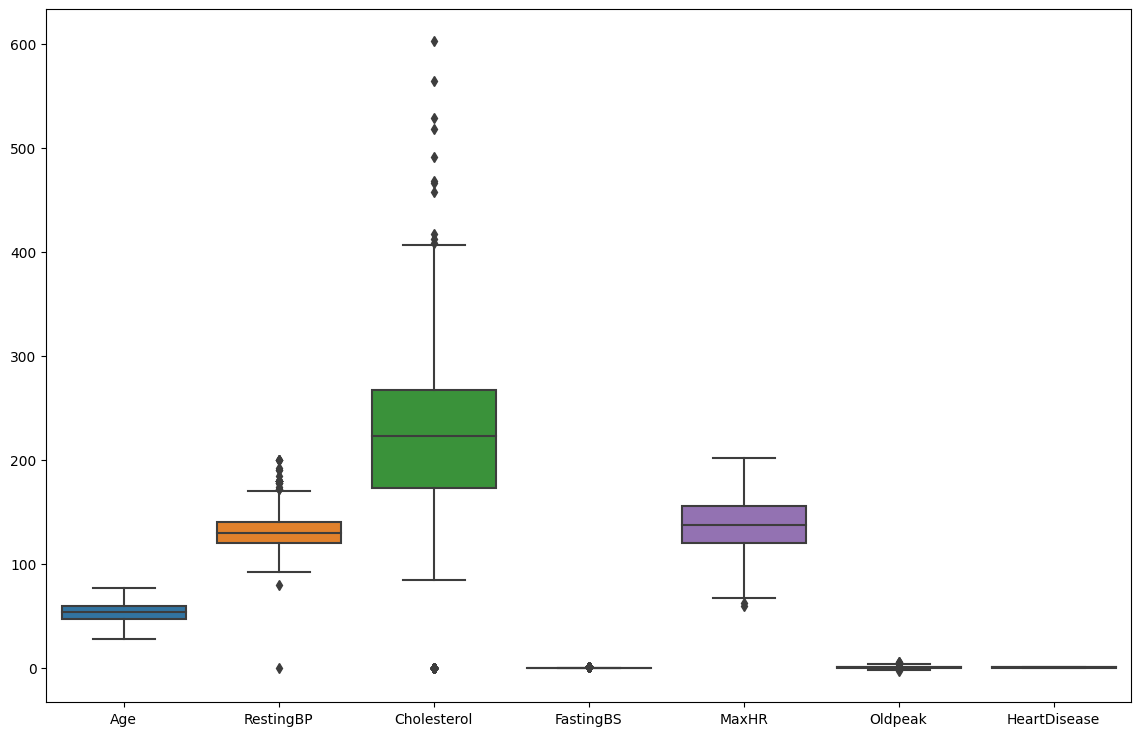

In [14]:
plt.figure(figsize=(14,9))
sns.boxplot(data=df)

The codes below shows the maximum and minimum outliers as well as the outliers for each attribute. Our data set is used to forecast heart disease, and this forecast depends on changes in MaxHR and Oldpeak. Thus, we are unable to remove these rows. We must transform these values because Cholesterol and RestingBP cannot both be 0, even in the case of a dead person who still has hydrostatic blood pressure. 

after the boxplot we find that the outliers here in (age - restingBP-cholesterol-MaxHR-oldpeak)

so that i decided to make alist of them 

In [15]:
df_num_name = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


also in cholesterol histogram we can see there are some zero values that we want to deal with them.

In [16]:
#here we are detecting outliers :

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [17]:
#here we are trying to find the numbers of outliers and max and min of them to can detect them clearly:
outliers = find_outliers_IQR(df['RestingBP'])
print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of outliers: 28
max outlier value: 200
min outlier value: 0


we find that there are 27 outliers and max ouliers id 200 and the min is 80 

In [18]:
for char in df_num_name :
    outliers = find_outliers_IQR(df[str(char)])
    
    print(f"-Check {char} outliers ")

    print('number of outliers: '+ str(len(outliers)))

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min())+ '\n')

-Check Age outliers 
number of outliers: 0
max outlier value: nan
min outlier value: nan

-Check RestingBP outliers 
number of outliers: 28
max outlier value: 200
min outlier value: 0

-Check Cholesterol outliers 
number of outliers: 183
max outlier value: 603
min outlier value: 0

-Check MaxHR outliers 
number of outliers: 2
max outlier value: 63
min outlier value: 60

-Check Oldpeak outliers 
number of outliers: 16
max outlier value: 6.2
min outlier value: -2.6



We began by dealing with cholesterol. We determined the number of cholesterol values equal to 0 and found that there are 172 of them. 

In [19]:
print(f" original shape of Cholesterol : {df.Cholesterol.shape}")

ziro_Cholesterol = df[df['Cholesterol'] == 0]
print(f" zero values of Cholesterol : {ziro_Cholesterol.shape}")

non_ziro_Cholesterol = df[df['Cholesterol'] != 0]
print(f" non zero values of Cholesterol : {non_ziro_Cholesterol.shape}")

 original shape of Cholesterol : (918,)
 zero values of Cholesterol : (172, 12)
 non zero values of Cholesterol : (746, 12)


In [20]:
df.loc[df['Cholesterol'] == 0,'Cholesterol'] = np.nan
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [21]:
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].median())
df["Cholesterol"]

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

To eliminate the zeros, we first set their initial value to np.nan and then set their values to the median of the values of the other rows.

In [26]:
ziro_RestingBP = df[df['RestingBP'] == 0]
print(f"zero value of RestingBP : {ziro_RestingBP.shape} ")

zero value of RestingBP : (0, 12) 


We found the pressure at 0 and dropped it.

In [25]:
ziro_RestingBP = df[df['RestingBP'] == 0]
ziro_RestingBP

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [27]:
df = df.drop(df[(df['RestingBP'] == 0)].index) 
#after this we decide to drop this columns 

Outliers after preprocessing :

In [28]:
for char in df_num_name :
    outliers = find_outliers_IQR(df[str(char)])
    
    print(f"-Check {char} outliers ")

    print('number of outliers: '+ str(len(outliers)))

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min())+ '\n')

-Check Age outliers 
number of outliers: 0
max outlier value: nan
min outlier value: nan

-Check RestingBP outliers 
number of outliers: 27
max outlier value: 200
min outlier value: 80

-Check Cholesterol outliers 
number of outliers: 41
max outlier value: 603.0
min outlier value: 85.0

-Check MaxHR outliers 
number of outliers: 2
max outlier value: 63
min outlier value: 60

-Check Oldpeak outliers 
number of outliers: 16
max outlier value: 6.2
min outlier value: -2.6



In [29]:
normal_RestingBP = df[df['RestingBP'] <= 120 ]
PreHyper_RestingBP = df[(df['RestingBP'] > 120) & (df['RestingBP']<= 139) ]
High1_RestingBP = df[(df['RestingBP'] >= 140) & (df['RestingBP']<= 159) ]
High2_RestingBP = df[(df['RestingBP'] >= 160) & (df['RestingBP']<= 180) ]
HyperTensive_RestingBP = df[df['RestingBP'] >= 180]
#here we detect the restingbp